## The data has random uniform noise added
<url> : https://www.kaggle.com/code/raddar/the-data-has-random-uniform-noise-added

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import DATA, PICKLE

In [3]:
x = pd.read_pickle(os.path.join(DATA, PICKLE, "train_data.pkl"))

* お金（米ドル）の場合、$0.01刻みの離散的な値のはず
* debitなら預金の限界、creditなら上限があるはずなので、持ち金に関する説明変数にはspikeが現れるはず

/home/marimo/poetry_projects/amex-default-prediction/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_2'>

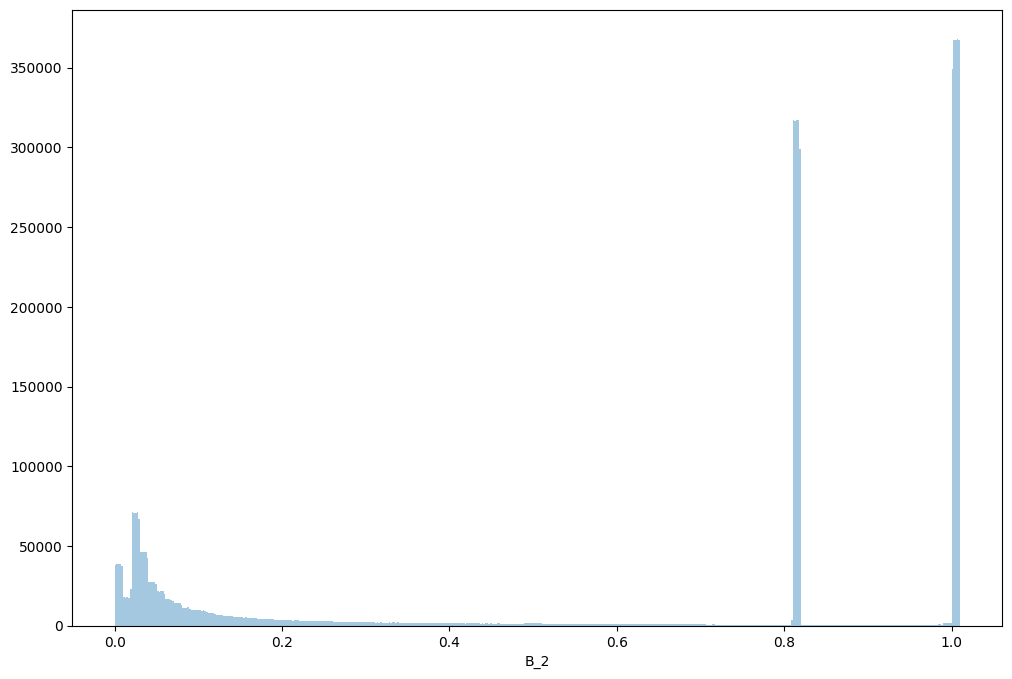

In [4]:
plt.figure(figsize=(12, 8))
sns.distplot(x["B_2"], bins=500, kde=False)

/home/marimo/poetry_projects/amex-default-prediction/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B_2'>

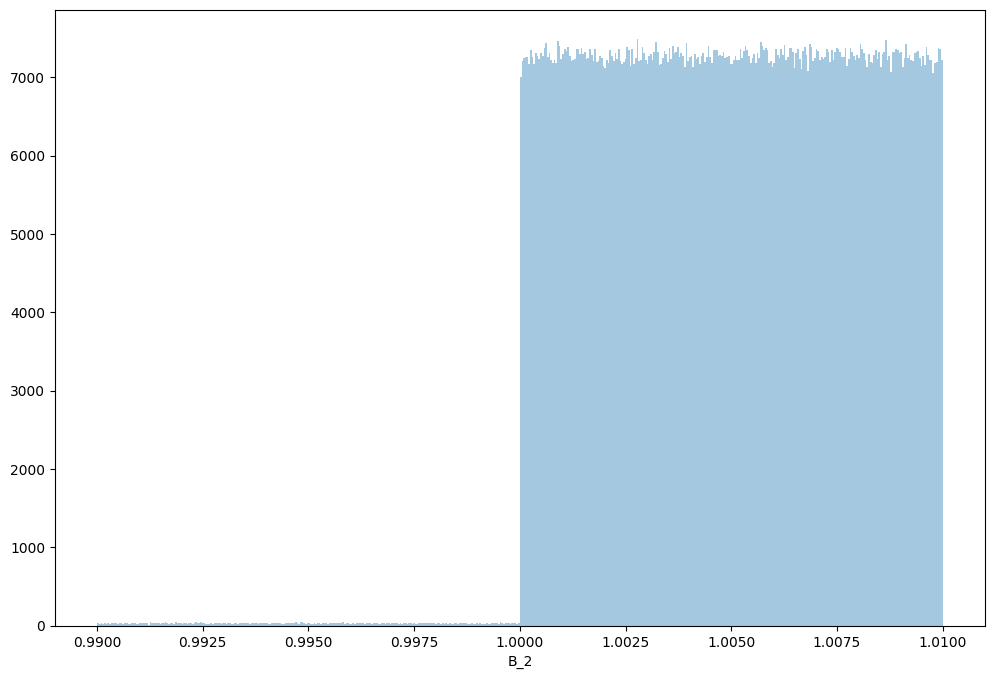

In [5]:
plt.figure(figsize=(12, 8))
sns.distplot(x.loc[x.B_2>0.99, "B_2"], bins=500, kde=False)

* ドルなら0.01刻みのはずなので、本来B_2は上限1, そこに[0, 0.01]の一様乱数を加えてコンペ用にされたのでは？という仮設

<AxesSubplot:xlabel='B_2'>

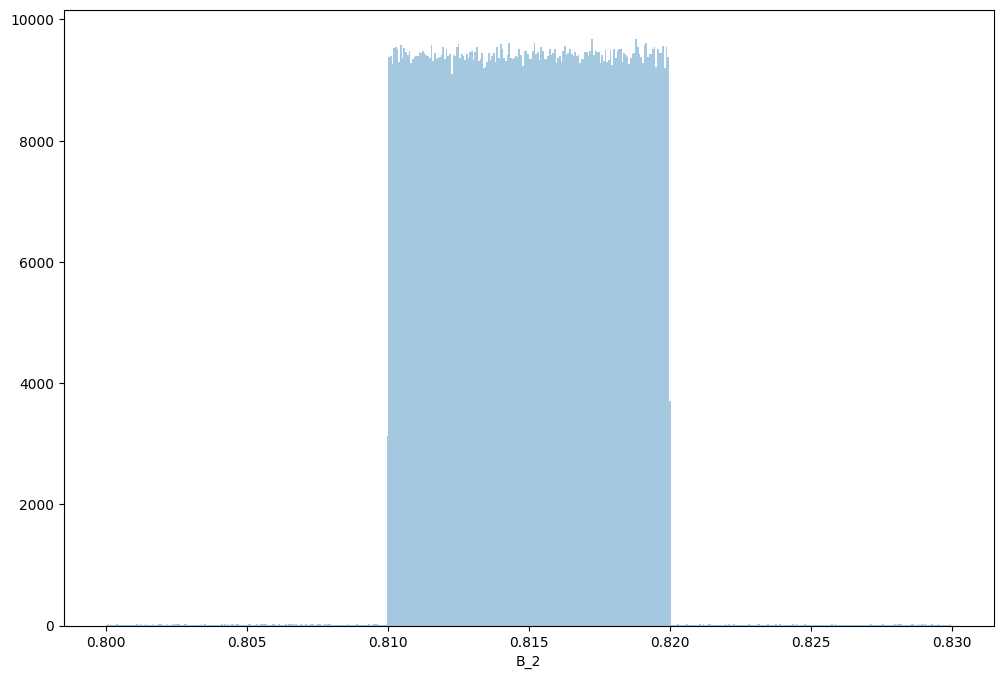

In [8]:
plt.figure(figsize=(12, 8))
sns.distplot(x.loc[(x.B_2>0.8) & (x.B_2<0.83), "B_2"], bins=500, kde=False)

* やはり、0.80に[0, 0.01]の一様乱数が加わったような挙動に見える

In [9]:
len(x["B_2"].unique())/len(x["B_2"])

0.9996357194522739

* 99.9%がunique valueって、銀行口座の預金額の分布から言ってありえるか？